# Prepocessing dataset for the multilabel event type detection

I use glen dataset for the 3400 event type detection problem.
The raw metadata `xpo.json` downloaded from [here](https://github.com/ZQS1943/GLEN/blob/master/data/xpo_glen.json).


In [ ]:
import os
import pandas as pd
import numpy as np
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
meta_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/glen/glen.csv")
meta_df.sample(10)

,DWD,name,wd_description,overlay_parents,Unnamed: 4,Unnamed: 5
2632,DWD_Q1043452,maintenance,"operational and functional checks, servicing, ...",process,NaN,NaN
2077,DWD_Q61071643,hailstorm,storm characterized by the presence of hail,stormmeteorological_disaster,NaN,NaN
4658,DWD_Q27861170,withdrawal,mental process,mental_process,NaN,NaN
105,DWD_Q6206738,intra-company_transfer,where a company reassigns an employee to work ...,change,NaN,NaN
4312,DWD_Q500669,technical_process,process performed in a technical system,planned_process,NaN,NaN
3416,DWD_Q65659335,property_damage,crime involving damaging or destroying public ...,damage,NaN,NaN
3333,DWD_Q113796,precipitation,chemical process leading to the settling of an...,chemical_process,NaN,NaN
1275,DWD_Q17008689,decontamination,instrument processing,removal,NaN,NaN
399,DWD_Q2538907,arms_trade,trade involving weapons being bought and sold,trade,NaN,NaN
2733,DWD_Q3968640,mental_state,"indication of a person's mental health, as det...",occurrence,NaN,NaN


In [ ]:
# Make sure that the data loaded
meta_df.shape

(4709, 6)

In [ ]:
name_count = meta_df.name.value_counts()


In [ ]:
# For the multilabel event type detection we use wd_description, name
columns = ['wd_description', 'name']
meta_dfs = meta_df[columns]

In [ ]:
meta_dfs.head(3)

,wd_description,name
0,psychological state in which an individual hol...,belief
1,deliberately fabricated falsehood made to masq...,hoax
2,"status between belief and disbelief, involves ...",doubt


In [ ]:
# encode event type into labele columns
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(meta_dfs.name)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# We successfully generated a event type encoding for every event or name
# len(labels)

In [ ]:
# There are in total 4709 event type
labels[1]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
df = pd.concat([meta_dfs[['wd_description']], pd.DataFrame(labels)], axis=1)
df.columns = ['wd_description'] + list(mlb.classes_)
df.head(4)

,wd_description,,',-,_,a,b,c,d,e,...,s,t,u,v,w,x,y,z,è,é
0,psychological state in which an individual hol...,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,deliberately fabricated falsehood made to masq...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,"status between belief and disbelief, involves ...",0,0,0,0,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0
3,accept responsibility for something that has h...,0,0,0,1,1,1,1,0,1,...,1,1,0,0,0,0,1,0,0,0


In [ ]:
# For our task we remove the event type with small number of event
columns = df.columns
# Find the frequencies of the articles in every event type
categor_freq = df[columns[2:]].sum()/df.shape[0]
categor_freq

'    0.000212
-    0.021236
_    0.362285
a    0.637503
b    0.130601
c    0.464430
d    0.260565
e    0.656190
f    0.131875
g    0.306859
h    0.191548
i    0.748354
j    0.017626
k    0.060522
l    0.389467
m    0.295392
n    0.682098
o    0.597791
p    0.263750
q    0.014016
r    0.568698
s    0.458059
t    0.641537
u    0.275218
v    0.123593
w    0.058824
x    0.039499
y    0.155447
z    0.028456
è    0.000212
é    0.000212
dtype: float64

In [ ]:
import matplotlib.pyplot as plt

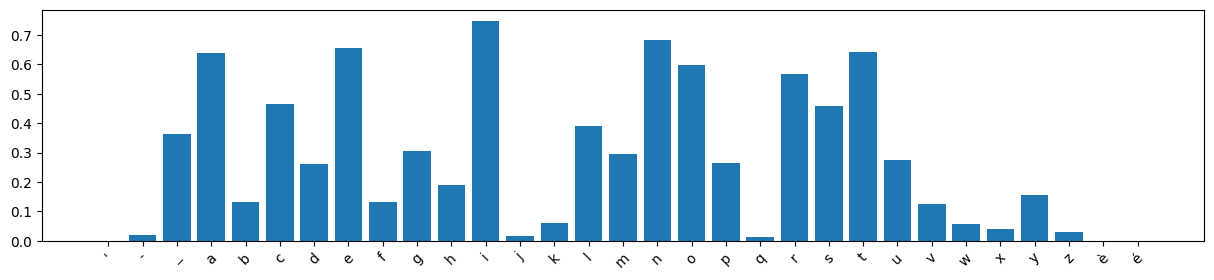

In [ ]:
plt.rcParams["figure.figsize"] = (15,3)
plt.bar(categor_freq.index, categor_freq.values)
_ = plt.xticks(rotation = 45)

In [ ]:
# Drop the event type with low frequencies
signif_cols = categor_freq.index[categor_freq.values>0.05]
df0 = df[['wd_description']+list(signif_cols)]
# Remove wd_description with zeros in all the categories
df0 = df0.loc[df0[signif_cols].sum(axis=1)>0]
df0.head(4)

,wd_description,_,a,b,c,d,e,f,g,h,...,n,o,p,r,s,t,u,v,w,y
0,psychological state in which an individual hol...,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,deliberately fabricated falsehood made to masq...,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,"status between belief and disbelief, involves ...",0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,accept responsibility for something that has h...,1,1,1,1,0,1,0,0,0,...,1,1,1,1,1,1,0,0,0,1


In [ ]:
df0.shape

(4709, 24)

In [ ]:
# Save the preprocessed data
data_dir = '/content/drive/MyDrive/Colab Notebooks/glen/multilabel_classification'
df0.to_csv(os.path.join(data_dir,"glen-preproc-data.tsv"), sep="\t", header=True, index=False)